# Importare le librerie statistiche

- `pandas` per l'analisi e gestione dei dati
- `matplotlib` per disegnare grafici
- `seaborn` per dei grafici esteticamente più "belli"
- `numpy` per generare dati (casuali ecc.)
- `plotly.express`per disegnare grafici interattivi


In [3]:
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns


## Importare i dati da un folgio excel o da un file csv 

In questo caso i dati vengono stoccati in un dataframe `pandas` ( `df1` per idati importati da csv e) e `df`per i dati importati da Excel) 

### Da CSV


In [4]:
df1 = pd.read_csv('data/esempio-dati.csv',index_col=0)


### Da Excel

In [5]:
df= pd.read_excel('data/esempio-dati.xlsx')

Vedia le prime  e le ultime righe del DataFrame `df`

In [6]:
df.head()


,height,age,weight
0,124.3,13,20.0
1,171.1,23,73.1
2,172.3,43,74.3
3,174.1,43,78.3
4,175.2,41,75.4


In [7]:
df.tail()

,height,age,weight
51,198.2,29,100.6
52,199.1,43,102.5
53,199.4,27,101.8
54,201.7,54,102.7
55,204.8,26,108.3


Notiamo una prima colonna con i numeri di riga (indici) creata automaticamente e due colonne di dati chiamate `height` 
e `age`

# Manipolazioni di base

Per accedere solo ad una serie di dati (una colonnna possiamo procedere in due modi:
- `df.` *nome colonna*
- `df['` *nome colonna* `']`


In [8]:
df.age.head()

0    13
1    23
2    43
3    43
4    41
Name: age, dtype: int64

In [9]:
df['height'].head()

0    124.3
1    171.1
2    172.3
3    174.1
4    175.2
Name: height, dtype: float64

Con la funzione `describe()` applicata al DataFrame otteniamo tutte le informazione statistiche di base (attenzione, la deviazione standard é quella del campione (n-1))

In [10]:
df.describe()

,height,age,weight
count,56.000000,56.000000,56.000000
mean,186.605357,36.196429,88.617857
std,11.238043,11.150898,12.090539
min,124.300000,13.000000,20.000000
25%,182.050000,26.750000,83.850000
50%,188.200000,36.000000,90.150000
75%,193.275000,45.250000,95.575000
max,204.800000,54.000000,108.300000


In [11]:
df.age.describe()

count    56.000000
mean     36.196429
std      11.150898
min      13.000000
25%      26.750000
50%      36.000000
75%      45.250000
max      54.000000
Name: age, dtype: float64

## Media, media, scarto quadratico medio

Per calcolare la media 

In [12]:
df.mean()

height    186.605357
age        36.196429
weight     88.617857
dtype: float64

o la mediana

In [13]:
df['height'].median()

188.2

La funzione `std` calcola la deviazione standard di un campione 
usando la formula $\dfrac{1}{N-1}\sum_{1}^{N} (\bar{x} -x_i)^2$

In [14]:
df['height'].std()


11.23804285197637

Per avere la deviazione standard sulla popolazione, secondo la formuale $\dfrac{1}{N}\sum_{1}^{N} (\bar{x} -x_i)^2$ usare il parametro `ddof=0`(zero gradi di libertà).

In [15]:
df.height.std(ddof=0)

11.13725119399591

# Creare una tabelle delle frequenze

In questo caso raggruppiamo i dati della colonna `height` in gruppi (intervalli) di 5 cm da 170 a 210 cm.

In [16]:
dfg= df['height'].groupby(pd.cut(df['height'], bins=range(170,210,5),right=False))
dfg.count().reset_index(name="count")



,height,count
0,"[170, 175)",3
1,"[175, 180)",5
2,"[180, 185)",11
3,"[185, 190)",13
4,"[190, 195)",16
5,"[195, 200)",5
6,"[200, 205)",2


Contare il numero di persone che hanno 20 o pià anni

In [17]:
df[df.age>=20].age.count()

53

Tabella delle medie di altezza per gruppi di età (dai 10 ai 70 anni con intervalli di 10 anni) 

In [18]:
dfg= df['height'].groupby(pd.cut(df['age'], bins=range(10,70,10),right=False))
dfg.mean().reset_index(name="mean")


,age,mean
0,"[10, 20)",163.933333
1,"[20, 30)",189.176471
2,"[30, 40)",187.363636
3,"[40, 50)",184.675000
4,"[50, 60)",191.811111


# Rappresentazioni grafiche

## Boxplot con Pandas

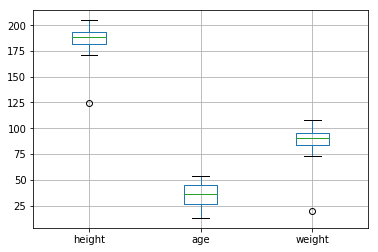

In [19]:
df.boxplot()

## Istogrammi con pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ab787b630>,
      dtype=object)

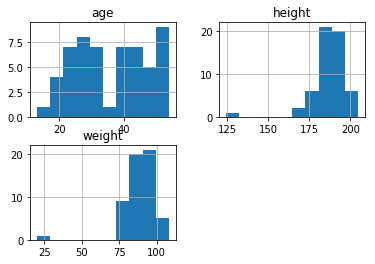

In [20]:
df.hist()

# Istogrammi  con matplotlib (custom)

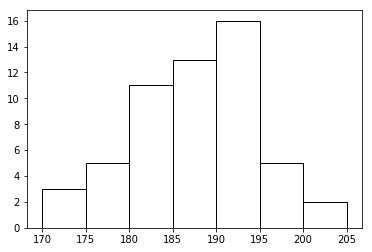

In [21]:
plt.hist(df['height'], bins=range(170,210,5), color='white', edgecolor='black');


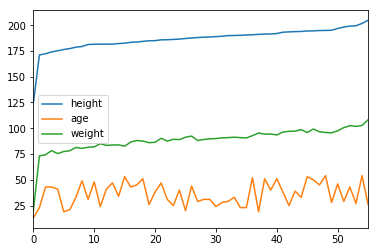

In [22]:
df.plot()

# Seaborn 

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,2))

## Boxplot

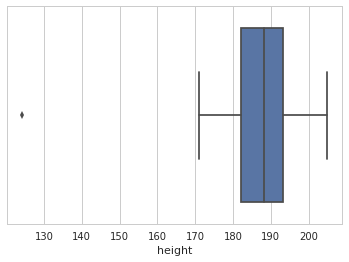

In [24]:
sns.boxplot(x=df['height'])

## Istogrammi

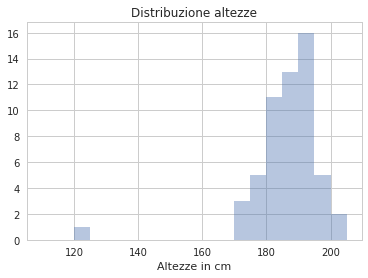

In [25]:
sns.distplot(
    df.height,
    kde=False,
    bins=range(110,210,5),
    axlabel='Altezze in cm'
).set_title('Distribuzione altezze')
plt.show()

## Violin plot

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0.5,0,'Altezze in cm')]

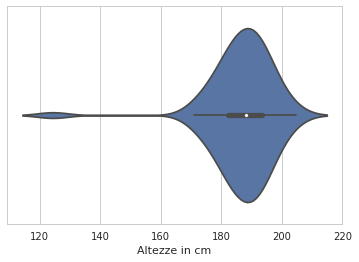

In [26]:
sns.violinplot(x=df.height).set(xlabel='Altezze in cm')


# Plotly express

## Istogramma e boxplot interattivi

In [27]:
px.histogram(
        df, #dataframe
        x="height", #colonna da usare nel dataframe
        title="Altezze", 
        template='seaborn',
        nbins=20,
        range_x=[110,210],
        opacity=0.5,
        marginal='box' ,
        labels={'height':'Altezze in cm'},
        width=600,
        height=600
    )

## Esportare un file html interattivo

In [28]:
fig=px.histogram(
        df, #dataframe
        x="height", #colonna da usare nel dataframe
        title="Altezze", 
        template='seaborn',
        nbins=20,
        range_x=[110,210],
        opacity=0.5,
        marginal='box' ,
        labels={'height':'Altezze in cm'},
        width=600,
        height=600
    )
fig.write_html("web/plotly.html")